<a href="https://colab.research.google.com/github/ByeongjuHwang/data-science-python/blob/main/3_1_correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python을 통한 상관분석


## pandas 사용하기
Python에서 상관분석을 하기 위해서는 pandas 라이브러리를 사용하면 됩니다.
pandas에서 제공하는 함수들을 통해 손쉽게 상관분석을 할 수 있습니다.

예를 들어, 두 변수 a와 b가 있다고 가정해봅시다. 이 때, a와 b의 상관계수를 구하려면 다음과 같이 코드를 작성할 수 있습니다.

```python
import pandas as pd

df = pd.DataFrame({'a': [1, 2, 3], 'b': [2, 4, 6]})
corr = df.corr()
print(corr)
```

위 코드에서 df.corr()는 DataFrame의 모든 열 간의 상관계수를 계산합니다.
결과는 다음과 같습니다.

```text
     a    b
a  1.0  1.0
b  1.0  1.0
```

위 결과에서 볼 수 있듯이, a와 b는 서로 완벽한 양의 상관관계를 가지고 있습니다.


In [1]:
import pandas as pd
import scipy.stats as stats # 상관계수 검정

df = pd.DataFrame({'a': [1, 2, 3], 'b': [2, 4, 6]}) # dictionary 사용
corr = df.corr() # correlation: 상관계수
print(corr)
print(stats.pearsonr(df['a'],df['b'])) # 피어슨의 상관계수

     a    b
a  1.0  1.0
b  1.0  1.0
PearsonRResult(statistic=0.9999999999999998, pvalue=1.3415758552508148e-08)


## seaborn과 matplot 사용하여 시각화하기


### 1. Tips 데이터셋

In [2]:
import seaborn as sns # 시각화 라이브러리, 기존에 존재하는 데이터 프레임을 시각, diamonds, iris, tips, titanic 등 데이터셋을 제공
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tips = sns.load_dataset('tips') # total_bill: 음식값
tips.head(6)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


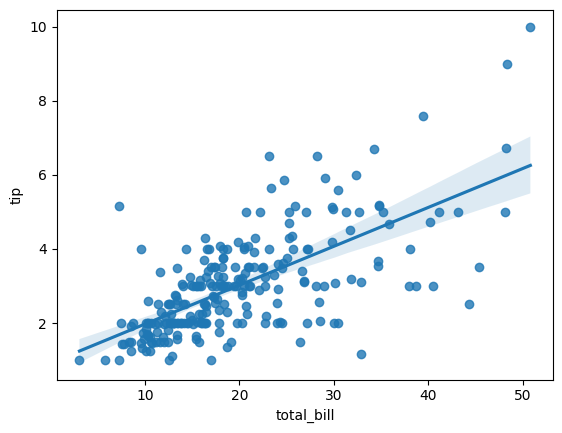

In [5]:
# 산점도와 직선을 함께 표현한 그래프
# 추정 회귀선: 직선
ax = sns.regplot(x='total_bill',y='tip',data=tips ) #regplot

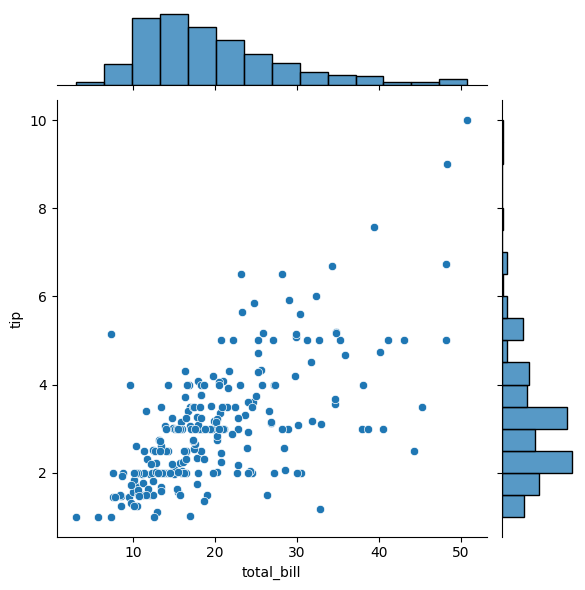

In [6]:
# 산점도와 히스토그램을 함께 표현한 그래프
# 히스토그램을 통해 자료가 어느 구간에 집중되어 있는지 확인
# 산점도를 통해 두 변수의 선형관계 확인
joint = sns.jointplot(x='total_bill',y='tip',data=tips) #jointplot

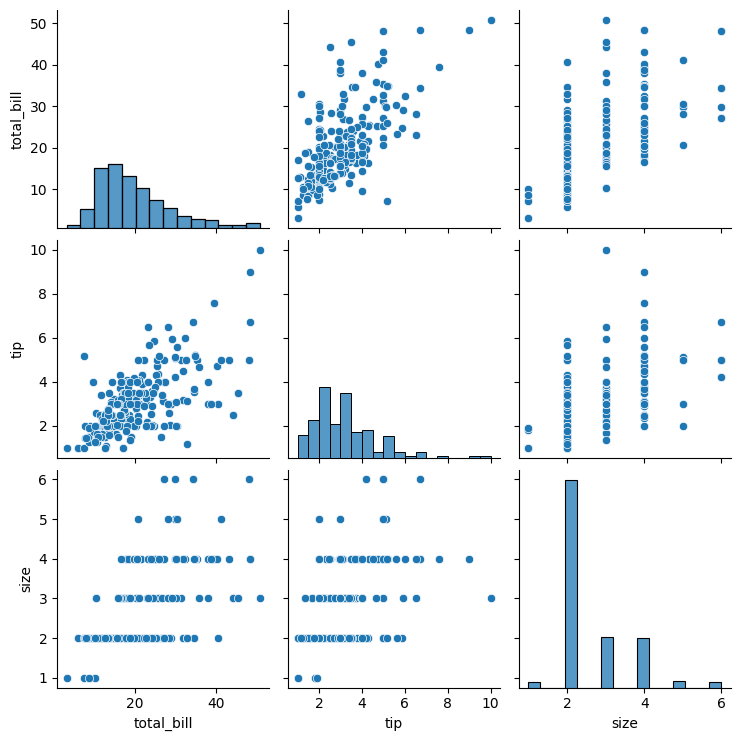

In [7]:
# 데이터들 간의 관계를 한눈에 알아볼 수 있
sns.pairplot(data = tips) #pairplot

### Titanic 데이터셋

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn에서 제공하는 데이터셋이며, 1912년 타이타닉호 침몰 사건과 관련한 데이터셋이다.
# 생존율, 객실 등급, 성별, 나이, 승객 요금 등의 정보를 알 수 있다.
raw = sns.load_dataset('titanic')
raw.corr(numeric_only=True)

# sibsp: 형제유무

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [9]:
df = raw.corr(numeric_only=True)
df

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


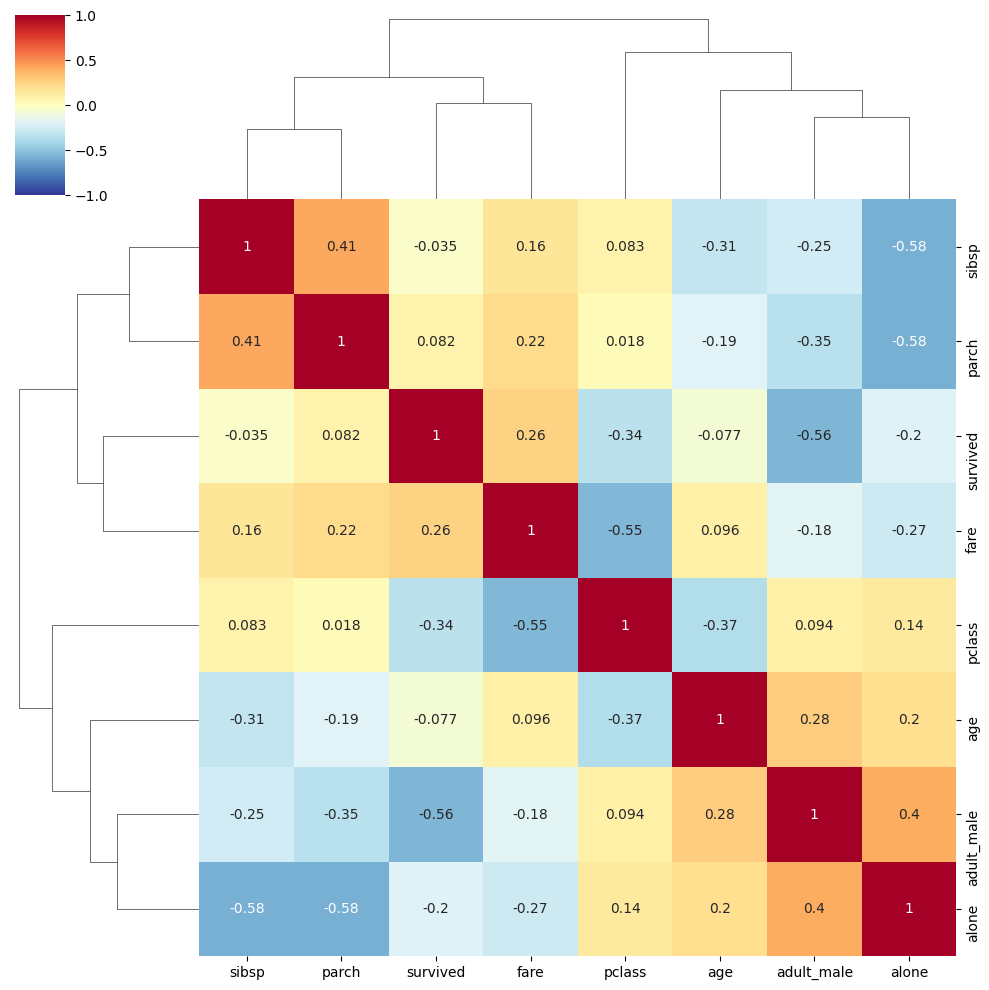

In [10]:
# annot, cmap: 색상 지정 -> 빨간색과 파란색을 사용하겠다는 것
# vmin, vmax: 상관계수 -1부터 1까지의 값을 지정하는 것
sns.clustermap(df,
               annot = True,
               cmap = "RdYlBu_r",
               vmin = -1, vmax = 1,)

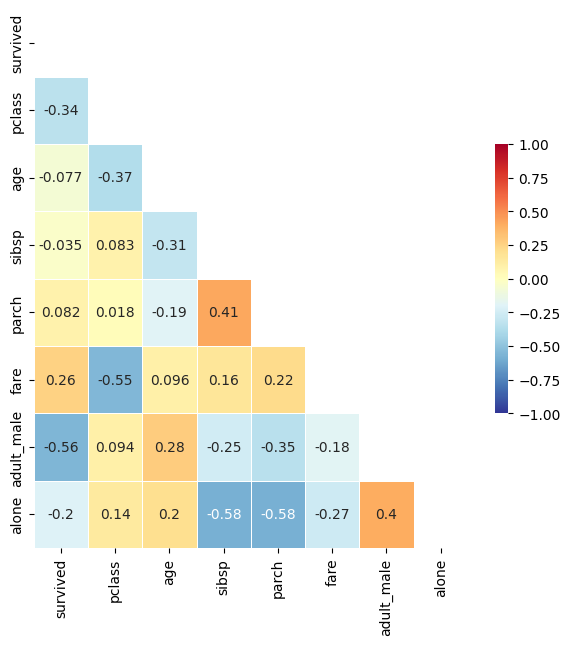

In [13]:
# 히트맵은 위쪽 부분과 아래쪽 부분이 대칭이므로 한쪽을 마스크하는 작업이다.

df = raw.corr(numeric_only=True)
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df,
            cmap = 'RdYlBu_r',
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.show()